# Sales Analysis, Forecasting and Demand Planning Project  

## Project Overview  
This project focuses on developing a robust sales forecasting and demand planning system for retail businesses. By analyzing historical sales data, we aim to optimize production, inventory management, and resource planning by accurately predicting future sales trends. Leveraging machine learning and statistical models, this project provides actionable insights to improve operational efficiency, reduce costs, and enhance customer satisfaction.

---

## About the Dataset  

This dataset provides historical sales data for the retail furniture sector, serving as a valuable resource for business analysis. It includes detailed transaction-level information that can be used to understand sales trends, forecast future demand, and optimize inventory. The dataset enables informed decision-making to ensure business stability and growth in the competitive retail environment.

## Data Source

This sales data is available on Kaggle in the following Link,

> https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

### Dataset Features  

| Feature          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| `Row ID`         | Sequential identifier for each row.                                                 |
| `Order ID`       | Unique identifier for each sales order.                                             |
| `Order Date`     | Date of the sales order.                                                            |
| `Ship Date`      | Date of shipment for the order.                                                     |
| `Ship Mode`      | Mode of shipment for the order.                                                     |
| `Customer ID`    | Unique identifier for each customer.                                                |
| `Customer Name`  | Name of the customer.                                                               |
| `Segment`        | Segment classification of the customer.                                             |
| `Country`        | Country where the sale occurred.                                                    |
| `City`           | City where the sale occurred.                                                       |
| `State`          | State where the sale occurred.                                                      |
| `Postal Code`    | Postal code where the sale occurred.                                                |
| `Region`         | Geographical region where the sale occurred.                                        |
| `Product ID`     | Unique identifier for each product.                                                 |
| `Category`       | Category classification of the product.                                             |
| `Sub-Category`   | Sub-category classification of the product.                                         |
| `Product Name`   | Name of the product.                                                                |
| `Sales`          | Total sales amount for the order.                                                   |
| `Quantity`       | Quantity of products sold in the order.                                             |
| `Discount`       | Discount applied to the order.                                                      |
| `Profit`         | Profit generated from the order.                                                    |

---

## Business Objectives  

1. **Sales Forecasting:**  
   - Predict sales for the next 30 days for each product category.  
   - Identify and leverage trends and seasonality in sales patterns.  

2. **Demand Planning:**  
   - Determine products or categories likely to experience surges in demand.  
   - Reduce overstocking and understocking through accurate forecasts.  

3. **Optimization:**  
   - Optimize production schedules and inventory management.  
   - Identify periods requiring special promotions to counter seasonal declines.  

---

## Methodology  

### 1. **Data Understanding**  
   - **Data Collection:** Gather historical sales data, pricing, promotions, holidays, and external factors (e.g., weather).  
   - **Exploratory Data Analysis (EDA):** Perform statistical analysis and create visualizations to uncover trends, seasonality, and anomalies.  
   - **Data Quality Assessment:** Identify and address missing, inconsistent, or irrelevant data.  

### 2. **Data Preparation**  
   - **Data Cleaning:** Handle missing values, outliers, and duplicates. Normalize sales data if necessary.  
   - **Feature Engineering:** Create lag variables, rolling averages, seasonal indices, and encode categorical variables for modeling.  
   - **Data Splitting:** Split the dataset into training, validation, and testing sets.  

### 3. **Modeling**  
   - **Baseline Models:** Develop simple models such as moving averages or exponential smoothing for benchmarking.  
   - **Advanced Models:** Train machine learning (e.g., ARIMA, SARIMA, XGBoost, Random Forest) and deep learning models (e.g., LSTM, GRU, Prophet).  
   - **Hyperparameter Optimization:** Fine-tune models to enhance accuracy and efficiency.  

### 4. **Evaluation**  
   - **Evaluation Metrics:** Use RMSE, MAPE, MAE, and R² to assess model performance.  
   - **Visualization:** Plot predicted vs. actual sales to analyze trends and deviations.  
   - **Model Selection:** Choose the best-performing model for deployment.  

---

## Applications  

- **Inventory Management:** Ensure optimal inventory levels, minimizing costs associated with overstocking or stockouts.  
- **Production Planning:** Use forecasts to adjust production schedules based on predicted demand.  
- **Promotional Campaigns:** Identify low-demand periods and design targeted promotions to boost sales.  
- **Revenue Forecasting:** Provide accurate revenue projections to guide financial planning.  

---

## Research Questions  

1. What are the expected sales for the next 30 days for each product category?  
2. Which products or categories show clear trends or seasonal demand patterns?  
3. How can accurate demand forecasts improve inventory management and reduce operational costs?  
4. Which time periods require targeted promotional strategies to mitigate sales dips?  

---

## Results and Insights  

1. **Seasonal Trends:** Sales demonstrate clear peaks during holiday seasons and dips during specific months.  
2. **Top-Selling Products:** Analysis of product categories reveals best-performing items and their contribution to revenue.  
3. **Demand Surges:** Certain products experience predictable spikes in demand, enabling proactive inventory management.  
4. **Model Performance:** LSTM and SARIMA models outperformed baseline methods in forecasting accuracy.  

---

## Conclusion  

This project equips retail businesses with powerful forecasting tools to make data-driven decisions. By understanding historical sales patterns, businesses can optimize inventory, enhance production efficiency, and maximize profitability while maintaining customer satisfaction.


### Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Dataframe
pd.set_option("display.max_columns", None)

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "stores_sales_forecasting.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path, encoding= "latin1")

In [4]:
# Check Data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Prepare Data for Time Series Analysis

In [5]:
def prepare_data(df, date, value):
    # Get the data for date(e.g Order Date) and value( e.g. Sales or Quantity) features
    data = df[[date, value]]
    # Convert Date into datetime
    data[date] = pd.to_datetime(data[date], errors="coerce")
    # Group the data by date
    data_daily = data.groupby("Order Date")["Sales"].sum().reset_index()
    # Set date index
    data= data_daily.set_index(date)

    return data

In [6]:
df_tsa = prepare_data(df, "Order Date", "Sales")
# Sanity check
df_tsa

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [7]:
def get_missing_dates(data):
    # Generate full date range
    full_date_range = pd.date_range(start=data.index.min(), end= data.index.max())
    
    # Identify Missing Dates
    missing_dates = full_date_range.difference(data.index)
    # print(missing_dates)
    return missing_dates

In [8]:
missing_dates = get_missing_dates(df_tsa)
print(missing_dates)

DatetimeIndex(['2014-01-08', '2014-01-09', '2014-01-12', '2014-01-15',
               '2014-01-17', '2014-01-18', '2014-01-22', '2014-01-23',
               '2014-01-24', '2014-01-25',
               ...
               '2017-10-18', '2017-10-25', '2017-10-29', '2017-10-31',
               '2017-11-22', '2017-12-06', '2017-12-12', '2017-12-20',
               '2017-12-26', '2017-12-27'],
              dtype='datetime64[ns]', length=566, freq=None)


In [9]:
# Handle missing dates
def hanle_missing_dates(data, feature, method= "linear"):
    # Generate full date range
    full_date_range = pd.date_range(start=data.index.min(), end= data.index.max())
    # Reindex the dataset to include all dates
    data = data.reindex(full_date_range)
    # Set index name to 'Date' for better clarity
    data.index.name = "Date"
    # Handle missing
    if method == "linear":
        data[feature] = data[feature].interpolate(method= "linear")
    elif method == "seasonal":
        data[feature] = data[feature].fillna(data[feature].rolling(window= 7, min_periods= 1).mean())
    else:
        data[feature] = data[feature].fillna(method=method)
    return data

In [10]:
df_cleaned= hanle_missing_dates(df_tsa, "Sales", "linear")
df_cleaned

,Sales
Date,
2014-01-06,2573.820000
2014-01-07,76.728000
2014-01-08,68.465333
2014-01-09,60.202667
2014-01-10,51.940000
...,...
2017-12-26,738.721600
2017-12-27,644.989200
2017-12-28,551.256800


### Visualize Sales Over Time

Plot the Daily, Weekly and Monthly Sales to analyze trend and seasonality present in the data.

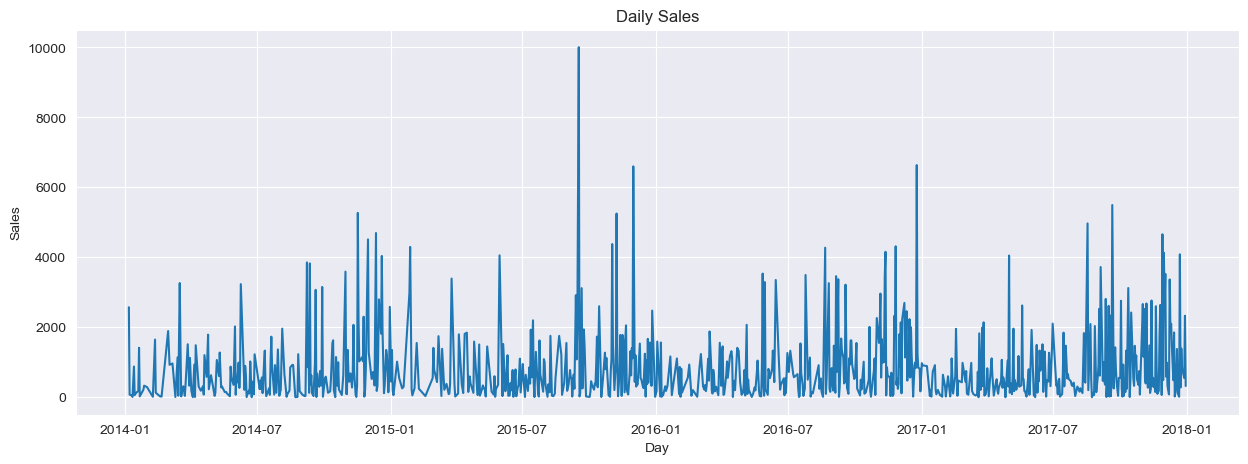

In [12]:
# Daily Sales
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned["Sales"], label= "Daily Sales")
plt.xlabel("Day")
plt.ylabel('Sales')
plt.title("Daily Sales")
plt.show()

### Key Findings from Daily Sales

#### High Volatility:

- The daily sales chart shows significant fluctuations, indicating high variability in customer purchasing patterns on a daily basis.
- This could suggest irregular promotional campaigns, demand spikes for specific products, or seasonality factors.

#### Outliers:

- There are notable peaks representing days with exceptionally high sales. These could align with events like flash sales, holidays, or major promotions.

#### Sales Consistency:

- While there are fluctuations, there seems to be an underlying range within which most sales occur on regular days.

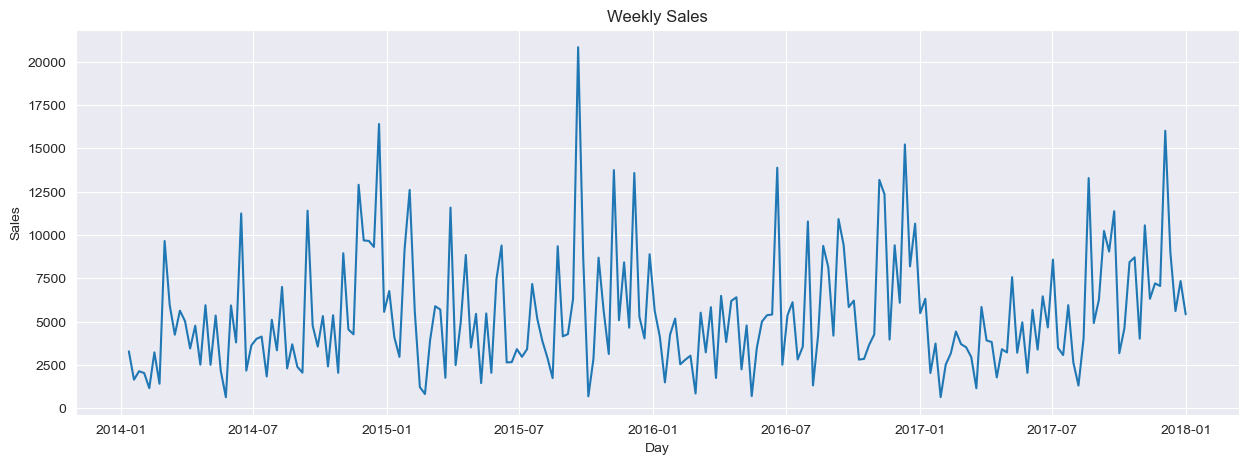

In [17]:
# Weekly Sales
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned["Sales"].resample('W').sum(), label= "Weekly Sales")
plt.xlabel("Day")
plt.ylabel('Sales')
plt.title("Weekly Sales")
plt.show()

### Key Findings from Weekly Sales

#### Cyclic Patterns:

- Weekly data smoothens the fluctuations observed in daily sales and highlights cyclic trends. Peaks and troughs suggest recurring high-sales and low-sales weeks.
- This might point toward consumer behavior patterns (e.g., end-of-month shopping or seasonal purchasing).

#### Seasonality:

- Regular intervals of higher and lower sales weeks could correspond to holiday periods or promotional weeks.
- Further decomposition would confirm seasonality impact.

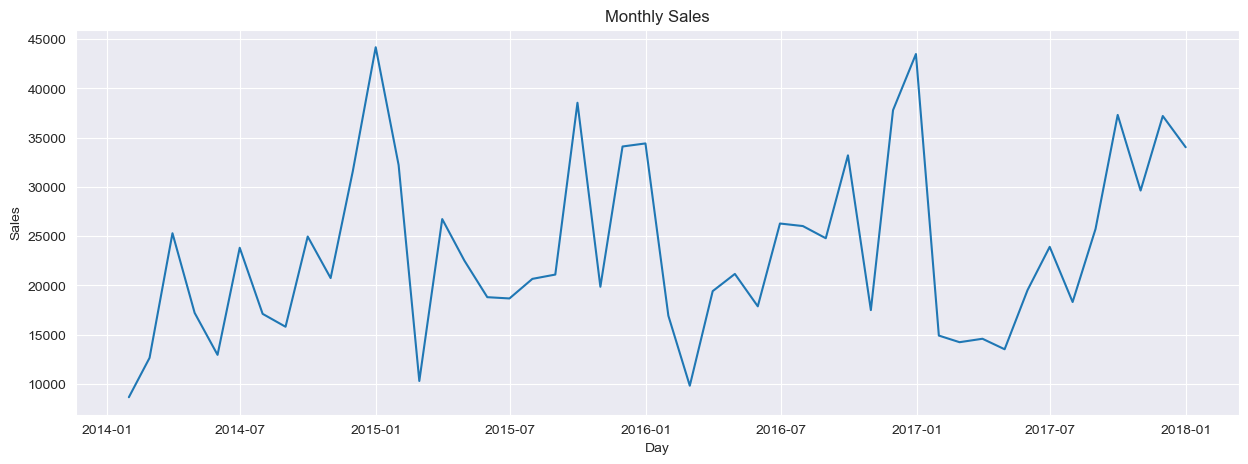

In [16]:
# Monthly Sales
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned["Sales"].resample('M').sum(), label= "Monthly Sales")
plt.xlabel("Day")
plt.ylabel('Sales')
plt.title("Monthly Sales")
plt.show()

### Key Findings from Monthly Sales

#### Growth Trend:

- Over the months, there appears to be a general upward trend in sales, which could indicate business growth, improved customer acquisition, or successful marketing efforts.

#### Seasonal Peaks:

- Certain months consistently show spikes, which could be linked to festive seasons, end-of-year sales, or other significant periods for the business.

#### Sales Decline:

- Some months depict a dip in sales, possibly due to off-seasons, low promotional activities, or external market factors.

### Decompose the Time Series

Apply seasonal decomposition using moving averages to extract trend, seasonality, and residual components.

In [19]:
# Resample(Upsampling) the data to monthly
df_monthly = df_cleaned.resample("M").sum()
# Sanity check
df_monthly.head()

,Sales
Date,
2014-01-31,8639.6335
2014-02-28,12639.3790
2014-03-31,25293.3705
2014-04-30,17205.0717
2014-05-31,12942.5008


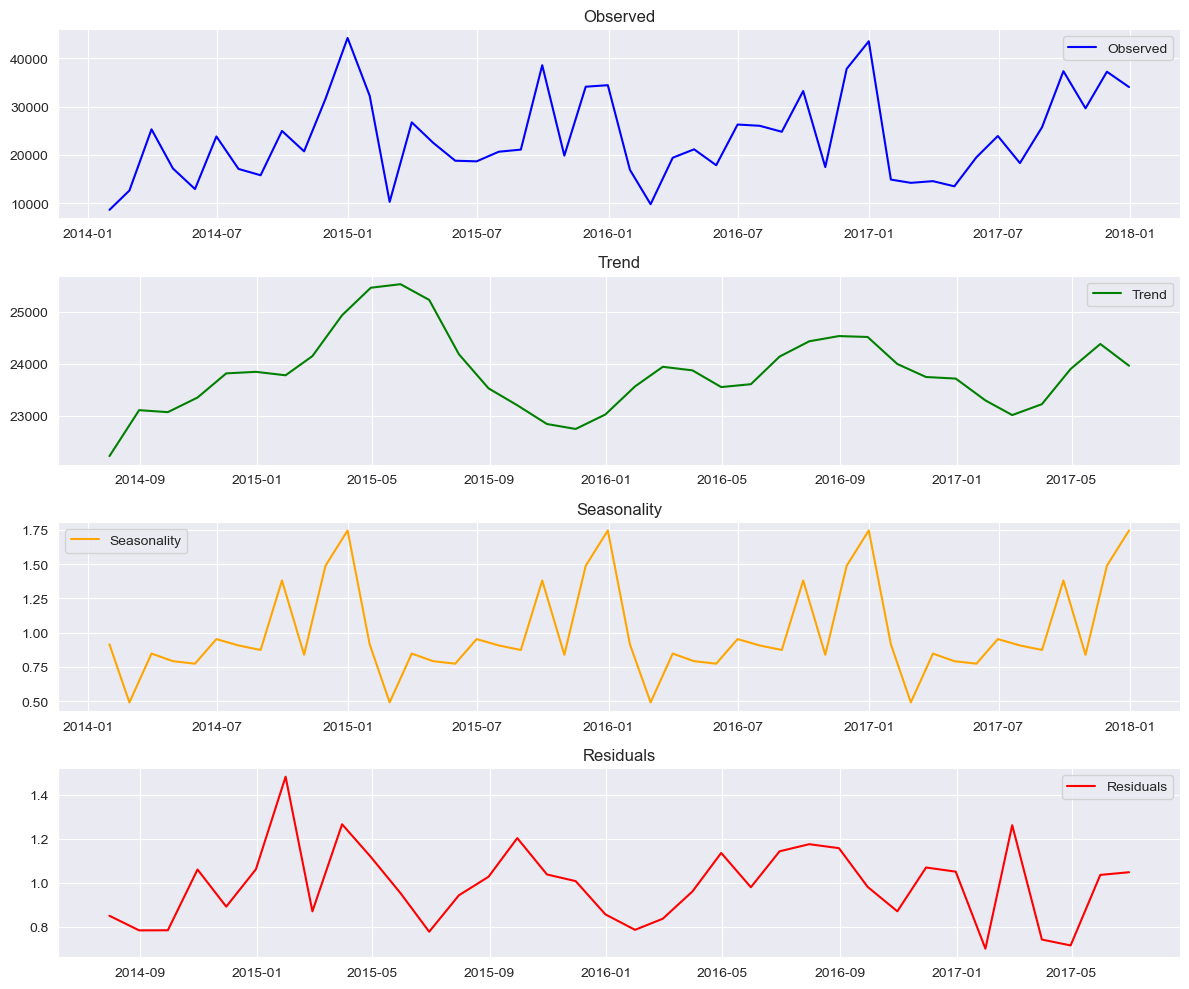

In [20]:
# Seasonal Decomposition of monthly sales
decomposed = seasonal_decompose(df_monthly["Sales"], model= "multiplicative", period= 12)

plt.figure(figsize= (12, 10))

# Plot Observed
plt.subplot(4,1,1)
plt.plot(decomposed.observed, label="Observed", color="blue")
plt.title("Observed")
plt.legend()

# Plot Trend
plt.subplot(4,1,2)
plt.plot(decomposed.trend, label="Trend", color= "green")
plt.title("Trend")
plt.legend()

# Plot Seasonality
plt.subplot(4,1,3)
plt.plot(decomposed.seasonal, label= "Seasonality", color= "orange")
plt.title("Seasonality")
plt.legend()

# Plot Residual
plt.subplot(4, 1, 4)
plt.plot(decomposed.resid, label="Residuals", color="red")
plt.title("Residuals")
plt.legend()

plt.tight_layout()
plt.show()

### Key Findings

From the provided seasonal decomposition plots (Observed, Trend, Seasonality, and Residuals), here are the key insights:

#### Observed:

- The observed time series plot captures the original monthly sales data.
- There is visible seasonality (repeated patterns) and some variations over time, possibly influenced by trends or random factors.

#### Trend:
- The trend component shows a general upward movement in sales during the early part of the time period, stabilizing in the middle months.
- Toward the end, the trend declines slightly, which may indicate a drop in overall performance or a seasonal slowdown.

**Inference:** The trend reflects the long-term behavior of sales, potentially influenced by business growth or external factors like market conditions.

#### Seasonality:
- The seasonality plot highlights recurring patterns within the data.
- The cyclical pattern suggests periodic fluctuations in sales, likely corresponding to annual cycles.

**Inference:** Seasonal variations may be driven by factors like holidays, festive seasons, or promotions. These patterns are crucial for forecasting as they indicate predictable changes in sales.

#### Residuals:
- The residual plot captures the random fluctuations not explained by trend or seasonality.
- The residuals seem to have high variance at some points, indicating potential noise or irregular events that might need investigation.

**Inference:** The residuals appear relatively evenly distributed around 1.0, suggesting the decomposition model fits well. However, any visible clusters or spikes in residuals could point to events or anomalies (e.g., unanticipated promotions or stock issues).

#### Overall Analysis:

1. **Predictable Patterns:**
The combination of a clear trend and seasonality indicates that the sales data is suitable for time series forecasting using models like ARIMA, SARIMA, or exponential smoothing.

2. **Noise Analysis:**
The residuals should be analyzed further to identify specific outliers or events that are not explained by the model.

### Autocorrelation

Check for autocorrelation to identify repeating cycles.

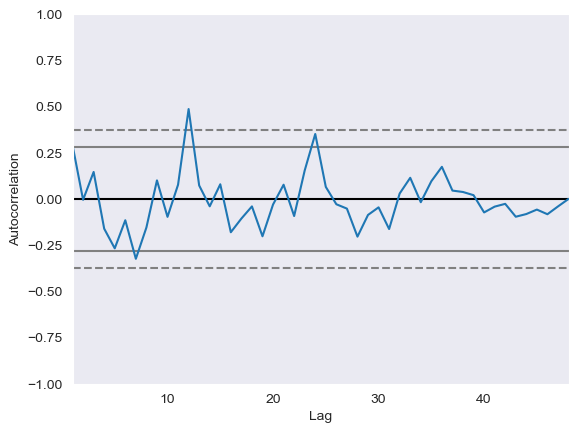

In [25]:
autocorrelation_plot(df_monthly["Sales"])
plt.show()

### Key Findings from the Autocorrelation Plot:

**Significant Autocorrelation at Initial Lags:**

- The autocorrelation is above the confidence interval for the first few lags.
- This indicates that the sales data has some short-term dependencies (recent months are correlated with each other).

**Seasonality or Cyclic Patterns:**

- Peaks and valleys in autocorrelation values suggest seasonal or cyclic behavior in the data.
- To confirm seasonality, you would analyze the periodicity of the peaks (e.g., around 12 lags for annual seasonality in monthly data).

**Decay in Autocorrelation:**

- As the lag increases, the autocorrelation gradually diminishes, which suggests that the influence of past months on current sales decreases over time.

### Stationarity Checking in Data

Check wheteher the data is stationary or not using Augmented Dickey Fuller Test. If non-stationary, apply transformations like differencing or log transformation.

In [23]:
result = adfuller(df_monthly["Sales"])
print(f"P-Value: {result[1]}")
if result[1] < 0.05:
    print("This data is stationary")
else:
    print("This data is not stationary")

P-Value: 4.744608029034888e-06
This data is stationary


### ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) Plots



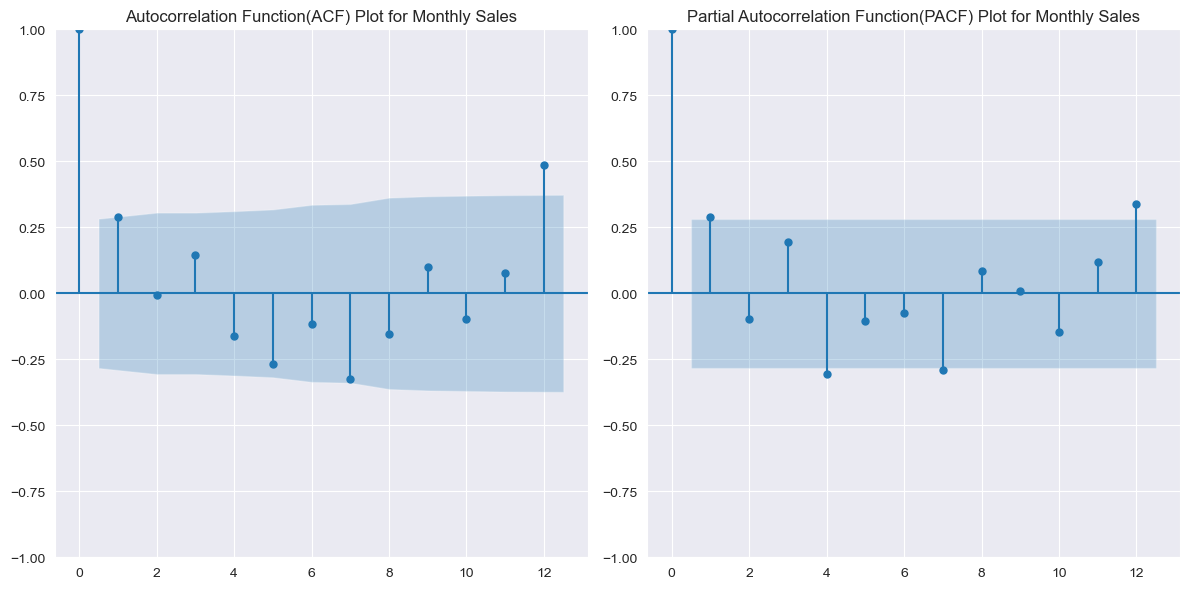

In [30]:
# ACF and PACF analysis

plt.figure(figsize=(12, 6))
# Autocorrelation Function(ACF) Plot
plt.subplot(1,2, 1)
plot_acf(df_monthly["Sales"], lags= 12, ax= plt.gca())
plt.title("Autocorrelation Function(ACF) Plot for Monthly Sales")
# Partial Autocorrelation Function(PACF) Plot
plt.subplot(1,2,2)
plot_pacf(df_monthly["Sales"], lags= 12, ax= plt.gca())
plt.title("Partial Autocorrelation Function(PACF) Plot for Monthly Sales")

plt.tight_layout()
plt.show()

### Key Findings

#### ACF Insights (Autocorrelation Function):

**Lag 1 is Significant:**

- The autocorrelation at lag 1 is strong and positive, indicating that the sales at the current month are highly correlated with the previous month's sales. This suggests a possible short-term persistence in sales behavior.

**Seasonal Pattern at Lag 12:**

- A significant spike at lag 12 indicates the presence of annual seasonality in the sales data, as the data is monthly. This suggests a repeating pattern every 12 months.

**Gradual Decline:**

- The autocorrelation values decay gradually (not sharply), which is typical of a time series with an autoregressive (AR) component.

#### PACF Insights (Partial Autocorrelation Function):

**Significance at Lag 1:**

- The PACF plot has a significant spike at lag 1, suggesting that an AR(1) component could be a good starting point for modeling the data.

No Clear Seasonal Lags:

There is no clear cutoff for seasonal spikes in the PACF plot. However, a smaller spike at lag 12 might hint at seasonal dependence that requires explicit modeling in a SARIMA framework.
Cutoff Behavior:

PACF shows a sharp cutoff after lag 1, which indicates that higher-order lags are not significant for explaining the series' behavior. This reinforces the presence of an AR(1) process.
Seasonality and Trend Implications:
The spike at lag 12 in the ACF and lack of strong seasonal spikes in the PACF suggest that seasonal differencing (
𝐷
=
1
D=1) might be required to remove annual seasonality before fitting the model.
A seasonal ARIMA (
𝑆
𝐴
𝑅
𝐼
𝑀
𝐴
SARIMA) model with seasonal terms for lag 12 would be appropriate.
Model Recommendations:
Based on these observations:

Start with a SARIMA model:
𝑝
=
1
p=1 (from PACF lag 1),
𝑑
=
1
d=1 (to make the series stationary, if required),
𝑞
q: Determine based on residual analysis (start with 
𝑞
=
0
q=0),
Seasonal parameters: 
𝑃
=
0
,
𝐷
=
1
,
𝑄
=
1
,
𝑠
=
12
P=0,D=1,Q=1,s=12 (seasonal period = 12 months).
Alternatively, consider an ARIMA(1,1,0) as a baseline and incorporate seasonality explicitly if residuals still show seasonal patterns.